# pandas - working with tabular data

*notebook by Jeffrey N. A. Aryee*

In this session, you will be introduced to the fundamentals of Pandas and its regular usage. 

The `pandas` library is the best python package for working with tabular data (i.e. data that is organised into rows and columns) and is one of the most preferred tools for data scientists to perform data manipulation and analysis. It is built on fundamental libraries, such as, `matplotlib` for data visualization and `numpy`, for scientific computing. The fast, flexible `pandas` data structures are designed to make real-world data analysis significantly easier, however it takes consistency in practice to master.


## What's pandas for?

Pandas has so many uses. It is essentially your data’s home. Through `pandas`, you get acquainted with your data by cleaning, transforming, and analyzing it. There are numerous tasks you can perform with Pandas on a dataset, which include but is not limited to:

- Calculating statistics of the data, and making inferrence such as
    - What's the average, median, max, or min of each column?
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?, etc.
- Clean the data (eg. removing missing values and filtering rows or columns by certain criteria)
- Visualize the data with help from Matplotlib or Seaborn. 
- Store the cleaned, transformed data into other file.

**Objectives**

The objective of this course is to introduce participants to the functionality of Pandas, with a primal focus on the underlisted:


1. [Installing Pandas](#1.-How-to-Install-Pandas)
2. [Importing Pandas](#2.-importing-pandas)
3. [Creating Data Series and Dataframes with Pandas](#3.-Creating-Data-Series-and-Data-frames-with-Pandas)
4. [Assessing Dataframe/Series information](#4.-Series/DataFrame-Information)
5. [Data Selection](#5.-Selection-from-Data-Series-and-DataFrames)
6. [Applying functions on a dataframe](#6.-Applying-functions-onto-a-dataframe)
7. [Data sorting and ranking with Pandas](#7.-Sort-and-Rank-with-Pandas)
8. [Dropping data values](#8.-Dropping-values-from-rows-(axis=0)-or-columns-(axis=1))
9. [Replacing dataframe elements with new value](#9-.-Replacing-dataframe-elements-with-a-new-value)
10. [Working with time series in Pandas](#10.-Working-with-Timeseries-in-Pandas): creating timeseries data, slicing and visualization with matplotlib
11. [Working with csv files in Pandas](#11.-working-with-Comma-separated-(.csv)-files-in-pandas)
12.	[Loading data from an excel spreadsheet using Pandas](#1.-Loading-data-from-.xlsx-Excel-spreadsheet-file)
13.  [Reshaping spreadsheet data](#2.-Reshaping-spreadsheet-data)
14.  [Visualisation with seaborn](#3.-Visualisation-with-seaborn)
15.  [Data slicing and groupby](#4.-Grouping-Data-with-Groupby()-function)
16.	[Working with timeseries data](#5.-Working-with-timeseries-data)


### 1. How to Install Pandas

Being a pure python package `pandas` can be installed either with `pip` or with `conda`. `pandas` is included with the `conda` environment for the course, but in general you would install by opening up your terminal / command line and install using either:
        
```bash
$> conda install pandas
```

or

```bash
$> pip install pandas
```

Precede the commands with (!) if you are attempting to install via the Jupyter cell or Spyder console (`!pip install pandas`).

### 2. importing `pandas`

By convention the pandas package is usually imported as `pd` as a shorthand (so that we don't have to type out `pandas` every time). We will also be using `numpy` so we'll import that too (as `np`, as is the usual convention):

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You can make use of the `help()` function with any pandas function/module and this produces a long-list documentation on use of the particular feature.

eg. `help(pd.date_range)`

In [70]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable' = None, closed=None, **kwargs) -> 'DatetimeIndex'
    Return a fixed frequency DatetimeIndex.
    
    Returns the range of equally spaced time points (where the difference between any
    two adjacent points is specified by the given frequency) such that they all
    satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
    the first and last time points in that range that fall on the boundary of ``freq``
    (if given as a frequency string) or that are valid for ``freq`` (if given as a
    :class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
    ``end``, or ``freq`` is *not* specified, this missing parameter can be computed
    given ``periods``, the number of timesteps in the range. See the note below.)
    
    Parameters
    ----------
    start : str or

### 3. Creating Data Series and Data frames with Pandas

The primary two components of pandas are the Series (essentially a column) and DataFrame (multi-dimensional table made up of a collection of Series).

In [71]:
# Creating a series in pandas
ds = pd.Series([3, -5, 7, 4], index=["Day 1", "Day 2", "Day 3", "Day 4"])
ds
type(ds)

pandas.core.series.Series

Next we'll create a DataFrame which can contain multiple columns of data.

An easy way to do this is to first create a dictionary of our data. A dictionary is a data type in Python and it is used to store data values in key:value pairs, contained in curly brackets. The dictionary should then have and item for each column, with the values for each item being list of the data values we want to put into the data frame.  We can then use the `.keys()` function of the dictionary to provide the column names:

In [72]:
data = {
    "Temperature": [30.2, 31.4, 32.5, 28.9],
    "Rainfall": [21.2, 10.4, 0, 2],
    "Wind Speed": [2.1, 3.4, 8.2, 4.1],
    "Wind Direction": ["SW", "S", "N", "NE"],
}

# Create a dataframe from the data and set the keys as column headers
df = pd.DataFrame(data, columns=data.keys())
df

,Temperature,Rainfall,Wind Speed,Wind Direction
0,30.2,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


In [73]:
type(df)

pandas.core.frame.DataFrame

### 4. Series/DataFrame Information

We will next have a quick look into the data properties and some intrinsic functions. NOTE: by default aggregation funtions (like calculation of the mean or min) skip any NaN (not-a-number) values

In [74]:
df.head(n=5)  # show the first n (5 by default) rows of the dataframe

,Temperature,Rainfall,Wind Speed,Wind Direction
0,30.2,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


In [75]:
df.shape  # Provides the shape of the dataframe

(4, 4)

In [76]:
df.size  # Provides the size of the dataframe

16

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     4 non-null      float64
 1   Rainfall        4 non-null      float64
 2   Wind Speed      4 non-null      float64
 3   Wind Direction  4 non-null      object 
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


In [78]:
df.columns  # Provides the column headers

Index(['Temperature', 'Rainfall', 'Wind Speed', 'Wind Direction'], dtype='object')

In [79]:
df.index  # Provides the row index of the dataframe

RangeIndex(start=0, stop=4, step=1)

In [80]:
df.describe()  # Gives a summarized statistical information of the data

,Temperature,Rainfall,Wind Speed
count,4.000000,4.00000,4.000000
mean,30.750000,8.40000,4.450000
std,1.550269,9.64987,2.633755
min,28.900000,0.00000,2.100000
25%,29.875000,1.50000,3.075000
50%,30.800000,6.20000,3.750000
75%,31.675000,13.10000,5.125000
max,32.500000,21.20000,8.200000


In [81]:
df.count()  # Provides the number of elements within the dataframe.

Temperature       4
Rainfall          4
Wind Speed        4
Wind Direction    4
dtype: int64

In [82]:
df.sum()  # Provides the summation of the dataframe elements.

Temperature        123.0
Rainfall            33.6
Wind Speed          17.8
Wind Direction    SWSNNE
dtype: object

In [83]:
df.cumsum()  # Provides the cumulative sum of the dataframe elements.

,Temperature,Rainfall,Wind Speed,Wind Direction
0,30.2,21.2,2.1,SW
1,61.6,31.6,5.5,SWS
2,94.1,31.6,13.7,SWSN
3,123.0,33.6,17.8,SWSNNE


In [84]:
df.min()  # Provides the minimumn/maximum of the dataframe elements.
df.max()

Temperature       32.5
Rainfall          21.2
Wind Speed         8.2
Wind Direction      SW
dtype: object

In [85]:
df.mean()  # Provides the average of the dataframe elements.

C:\Users\UncleJay\AppData\Local\Temp/ipykernel_55960/1308886968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()  # Provides the average of the dataframe elements.


Temperature    30.75
Rainfall        8.40
Wind Speed      4.45
dtype: float64

In [86]:
df.median()  # Provides the midpoint of the dataframe elements.

C:\Users\UncleJay\AppData\Local\Temp/ipykernel_55960/3858184190.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()  # Provides the midpoint of the dataframe elements.


Temperature    30.80
Rainfall        6.20
Wind Speed      3.75
dtype: float64

### 5. Selection from Data Series and DataFrames

The row numbers are the 'index' and the headers represent each column.

In [87]:
type(df["Temperature"])

pandas.core.series.Series

In [88]:
# DataFrame Selection
df[0:1]  # First row only
df[::2]  # Even rows/index
df[1::2]  # Odd rows/index

,Temperature,Rainfall,Wind Speed,Wind Direction
1,31.4,10.4,3.4,S
3,28.9,2.0,4.1,NE


In [89]:
# Selecting/Subsetting By Position
df.iloc[0]  # Elements of firat row only

Temperature       30.2
Rainfall          21.2
Wind Speed         2.1
Wind Direction      SW
Name: 0, dtype: object

In [90]:
# Select single value by row and column
df.iloc[[0], [0]]  # Element in first row and first column

,Temperature
0,30.2


In [91]:
# Selecting/Subsetting By Position
# Using iat
df.iat[0, 0]

30.2

By Label
Select single value by row and column labels
Any of the understated helps to do the same thing.

In [92]:
df.loc[[0], ["Temperature"]]

,Temperature
0,30.2


In [93]:
df.loc[0, "Temperature"]

30.2

In [94]:
df.loc[0]["Temperature"]

30.2

We can index into a `DataSeries` too

In [95]:
ds

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

In [96]:
ds["Day 1"]

3

In [97]:
ds["Day 1":"Day 4"]

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

In [98]:
ds["Day 1":"Day 4":2]

Day 1    3
Day 3    7
dtype: int64

**selection with boolean Indexing**

An alternative for identifying elements of a dataframe that meet a specific criteria is to pass the criteria within a square brackets attached to the dataframe.

For example:

`a[a>1]` implies extracting all a elements where the value of a exceeds 1.

In [99]:
# Boolean Indexing
ds[~ds > 2]  # Dataseries values not exceeding 2

Day 2   -5
dtype: int64

In [100]:
ds[(ds > -2) & (ds < 5)]  # Dataseries values ranging from -1 to 4

Day 1    3
Day 4    4
dtype: int64

In [101]:
ds[(ds > -2) | (ds < 5)]  # Dataseries values either exceeding -2 or below 5

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

In [102]:
# Use filter to adjust DataFrame
# Dataframe item where only the Temperature exceeds 32 degree Celsius
df[df["Temperature"] > 32]

,Temperature,Rainfall,Wind Speed,Wind Direction
2,32.5,0.0,8.2,N


In [103]:
# Assigning a value to index of a Series or DataFrame
ds["Day 1"] = 6  # Assigning by data series' index

In [104]:
df.iloc[0, 0] = 34  # Assigning value to first element of the dataframe

## 6. Applying functions onto a dataframe

A function is a block of code which only runs when it is called. It allows for easy code block use and re-use. You can pass data, known as parameters, into a function, and the function can return data as a result.

Default function format in Python is:

```python
def function_name(arg1, arg2, ...):
    return {expression}
```


Alternatively, we can use "lambda functions" in Python as effective "one-liners". A lambda function is a small anonymous function which can take any number of arguments, but can only have one expression.

**Syntax:**

```python
function_name = lambda arg1, arg2, ... : {expression}
```

In Pandas, a simplistic way to pass a function onto a dataframe is by using the **apply** method. 

Let's try to apply a simple function that doubles the individual items of the dataframe.



In [105]:
# First Approach
def double(x):
    y = x * 2
    return x * 2


# Now, let's apply the function to only the Temperature and Wind Speed column
df.loc[:, ["Temperature", "Wind Speed"]].apply(double)

,Temperature,Wind Speed
0,68.0,4.2
1,62.8,6.8
2,65.0,16.4
3,57.8,8.2


In [106]:
# Second Approach
f = lambda x: x * 2

# Now, let's apply the function to only the Temperature and Wind Speed column
df.loc[:, ["Temperature", "Wind Speed"]].apply(f)

,Temperature,Wind Speed
0,68.0,4.2
1,62.8,6.8
2,65.0,16.4
3,57.8,8.2


## 7. Sort and Rank with Pandas

This allows for arranging dataframe in a specified order (increasing/decreasing), based on priority.

In [107]:
df.sort_index()  # Sort by the index

,Temperature,Rainfall,Wind Speed,Wind Direction
0,34.0,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


In [108]:
df.sort_values(by="Wind Speed")  # sort by Wind Speed

,Temperature,Rainfall,Wind Speed,Wind Direction
0,34.0,21.2,2.1,SW
1,31.4,10.4,3.4,S
3,28.9,2.0,4.1,NE
2,32.5,0.0,8.2,N


In [109]:
df.sort_values(
    by=["Temperature", "Wind Direction"]
)  # Sort by Temperature and then Wind Direction

,Temperature,Rainfall,Wind Speed,Wind Direction
3,28.9,2.0,4.1,NE
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
0,34.0,21.2,2.1,SW


In [110]:
# Assign ranks to entries
df.rank()

,Temperature,Rainfall,Wind Speed,Wind Direction
0,4.0,4.0,1.0,4.0
1,2.0,3.0,2.0,3.0
2,3.0,1.0,4.0,1.0
3,1.0,2.0,3.0,2.0


## 8. Dropping values from rows (axis=0) or columns (axis=1)

Here, we will take a look at dropping specific columns or rows.

**Kindly take note:**
For the dataframe with dropped rows or columns to maintain their dropped rows/columns, we need to reassign the dropped dataframe to itself or simply assign to a new variable.


In [111]:
# Row drop
ds.drop(["Day 2"])

Day 1    6
Day 3    7
Day 4    4
dtype: int64

In [112]:
# Column drop
df.drop("Wind Direction", axis=1)

,Temperature,Rainfall,Wind Speed
0,34.0,21.2,2.1
1,31.4,10.4,3.4
2,32.5,0.0,8.2
3,28.9,2.0,4.1


In [113]:
# Column drop
# For the dataframe with dropped rows or columns to maintain their dropped rows/columns, we need to reassign
# the dropped dataframe to itself or simply assign to a new variable.
df_dropped = df.drop("Wind Direction", axis=1)
print(df_dropped)

   Temperature  Rainfall  Wind Speed
0         34.0      21.2         2.1
1         31.4      10.4         3.4
2         32.5       0.0         8.2
3         28.9       2.0         4.1


In [114]:
df["Temperature"]

0    34.0
1    31.4
2    32.5
3    28.9
Name: Temperature, dtype: float64

## 9 . Replacing dataframe elements with a new value

We can replace dataframe entries simply in Pandas. Let's give this a try.

In [115]:
df = df.replace({"Wind Speed": 2.1, "Rainfall": 0, "Temperature": 32.5}, np.nan)
df

,Temperature,Rainfall,Wind Speed,Wind Direction
0,34.0,21.2,NaN,SW
1,31.4,10.4,3.4,S
2,NaN,NaN,8.2,N
3,28.9,2.0,4.1,NE


## 10. Working with Timeseries in Pandas

Items to cover:

    * Time series data structures
    * Time-based indexing
    * Visualizing time series data using Matplotlib


In pandas, a single point in time is represented as a Timestamp. We can use the **Pandas to_datetime()** function to create Timestamps from strings in a wide variety of date/time formats.

In [116]:
pd.to_datetime('12/31/2021')
pd.to_datetime('2015-03-27 5:45pm')
pd.to_datetime(['Jun 1, 1989','2015-03-25', '7/8/1952', '2020 03 25'])  #Passing a list of date strings
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y') #Optimization with specified date format if all have similar format.


DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

With the dateutil module, you can parse dates from a variety of string formats.

In [117]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
pd.to_datetime(date)
pd.to_datetime("4th of July, 2015")

Timestamp('2015-07-04 00:00:00')

In the next step, we will create a range of dates using Pandas date_range feature. This will come in handy for our timeseries dataframe creation.

**Example:    pd.date_range('1980-01-01','2021-12-31', freq='M')**

The above-specified produces a monthly timeseries spanning 1st January 1980 to 31st December 2021.


***N/B: Without specifying the frequency, a default of daily time steps are created for the specified date range.***

In [118]:
# Default frequency is a daily frequency
df_new = pd.DataFrame(pd.date_range("1980-01-01", "2021-12-31"), columns=["Date"])
df_new

,Date
0,1980-01-01
1,1980-01-02
2,1980-01-03
3,1980-01-04
4,1980-01-05
...,...
15336,2021-12-27
15337,2021-12-28
15338,2021-12-29
15339,2021-12-30


Now, let's add some data and perform some Pandas timeseries functions

In [119]:
# We add random data to a new column (Random Values) in the new dataframe (df_new)

import numpy as np

df_new["Random Values"] = np.random.randn(len(df_new.Date)) + 20
df_new

,Date,Random Values
0,1980-01-01,20.922940
1,1980-01-02,20.581469
2,1980-01-03,19.914319
3,1980-01-04,18.952942
4,1980-01-05,20.971318
...,...,...
15336,2021-12-27,18.220848
15337,2021-12-28,17.143031
15338,2021-12-29,19.362684
15339,2021-12-30,17.756971


We set the date as index for easy visualization and selection

In [120]:
# Set Date as index for easy visualization
# Drop pre-existing Date Column after setting as index
df_new = df_new.set_index(df_new.Date).drop("Date", axis=1)
df_new

,Random Values
Date,
1980-01-01,20.922940
1980-01-02,20.581469
1980-01-03,19.914319
1980-01-04,18.952942
1980-01-05,20.971318
...,...
2021-12-27,18.220848
2021-12-28,17.143031
2021-12-29,19.362684


In [121]:
df_new.index.year  # This produces the years only of the various dates

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=15341)

In [122]:
df_new.index.month  # This produces the months only of the various dates

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=15341)

In [123]:
# Randomly show any 5 elements fron the df_new dataframe.
df_new.sample(5)

,Random Values
Date,
1997-12-26,18.376532
1994-09-12,20.013920
2019-01-22,20.870543
2007-06-22,18.824346
2021-10-30,20.416174


In [124]:
df_new.sample(5, random_state=0)

,Random Values
Date,
2005-08-01,18.590580
1982-09-28,19.759539
2000-06-19,17.976497
1991-05-08,20.681023
2000-04-06,20.812449


### Slicing A Timeseries

Let's attempt to slice the dataframe via the time. We could slice by single or multiple date(s). 

In [125]:
# Timeseries slicing
df_new["1984"]  # Slice only 1984 data

C:\Users\UncleJay\AppData\Local\Temp/ipykernel_55960/2463930426.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new["1984"]  # Slice only 1984 data


,Random Values
Date,
1984-01-01,19.892772
1984-01-02,20.482617
1984-01-03,20.089345
1984-01-04,21.667172
1984-01-05,19.204583
...,...
1984-12-27,19.427191
1984-12-28,20.529951
1984-12-29,19.020270


In [126]:
df_new["1984":"1989"]  # Slice data from 1984 to 1989

,Random Values
Date,
1984-01-01,19.892772
1984-01-02,20.482617
1984-01-03,20.089345
1984-01-04,21.667172
1984-01-05,19.204583
...,...
1989-12-27,19.772299
1989-12-28,17.956729
1989-12-29,20.099187


### Visualization of the Time Series

We make use of Pandas default plotting tool which is built on matplotlib. A few simple examples are provided below

<AxesSubplot:xlabel='Date'>

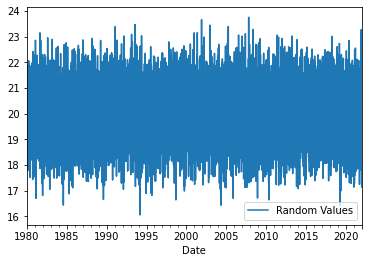

In [127]:
df_new.plot()  # Plotting the entire data series

C:\Users\UncleJay\AppData\Local\Temp/ipykernel_55960/2137887842.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new["1984"].plot()  # Plotting a sliced year data


<AxesSubplot:xlabel='Date'>

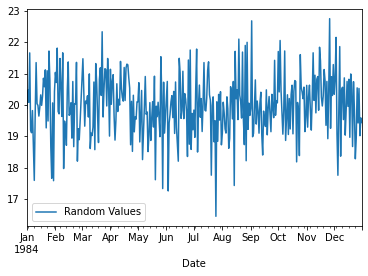

In [128]:
df_new["1984"].plot()  # Plotting a sliced year data

C:\Users\UncleJay\AppData\Local\Temp/ipykernel_55960/310241120.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new["1984-03"].plot()  # Plotting a sliced month data


<AxesSubplot:xlabel='Date'>

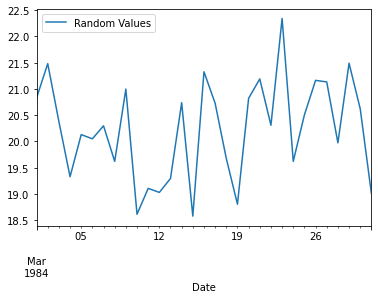

In [129]:
df_new["1984-03"].plot()  # Plotting a sliced month data

<AxesSubplot:xlabel='Date'>

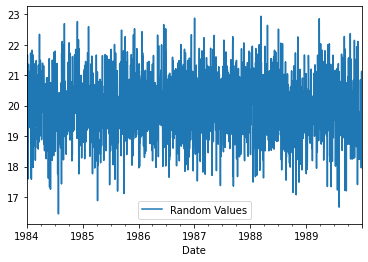

In [130]:
df_new["1984":"1989"].plot()  # Plotting a sliced multi-year data

<AxesSubplot:xlabel='Date'>

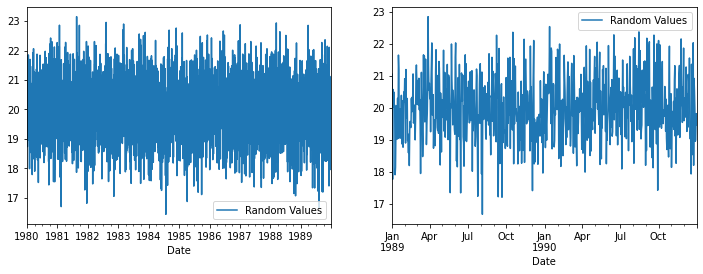

In [131]:
# to plot into specific axes the axes to use can be provided with the `ax` argument
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
df_new[:"1989"].plot(ax=axes[0])
df_new["1989":"1990"].plot(ax=axes[1])

## 11. working with Comma-separated (.csv) files in pandas

In this part, we shall briefly address working with csv files using pandas. A detail of working with spreadsheets will be treated in part 2 of this module.

In the introduction to numpy, you made use of data from the "Tamale_CRU_rainfall.csv" file. Let's utilize this dataset here again, however, with pandas. We start of by reading data from the csv file using the **pd.read_csv()** method.

In [132]:
import pandas as pd
from pathlib import Path
data_path = Path("data")
filepath_csv = data_path / "Tamale_CRU_rainfall.csv"
acsv = pd.read_csv(filepath_csv, sep=',')  #Read data from csv file with separator / delimiter set as comma.

In [133]:
acvs = acsv.rename(columns={'PRE': 'Year'}, inplace=True) #Rename column 1 from 'PRE' to 'Year'
acsv.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 13
0,1901.0,1.3,12.1,27.4,101.0,134.7,159.0,109.1,217.2,235.7,160.3,17.7,0.7,NaN
1,1902.0,1.8,6.2,82.2,124.9,189.3,119.6,170.8,205.0,158.9,99.9,12.1,10.3,NaN
2,1903.0,2.0,2.7,26.5,110.0,156.0,104.5,112.4,202.9,187.2,85.6,23.9,5.8,NaN
3,1904.0,5.1,5.2,47.9,79.6,146.0,121.2,122.8,119.2,166.4,99.9,14.6,8.8,NaN
4,1905.0,3.6,5.5,36.9,74.9,139.3,134.9,188.1,212.8,198.3,110.4,12.5,16.5,NaN


**All the earlier items we have done, can be implemented on this new dataset.
Let's simply (i) set the Year as index, (ii) delete from the columns and then (iii) visualize the yearly totals and monthly climatologies.**

In [134]:
acsv.index = acsv.Year        #Set Years as Index
acsv = acsv.drop('Year', axis=1)  #Drop Year Column 

<AxesSubplot:xlabel='Year', ylabel='Annual Rainfall Total'>

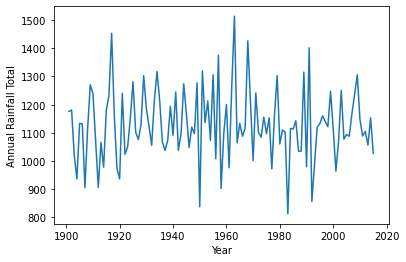

In [135]:
#Annual/Yearly Totals
acsv.sum(axis=1).plot(ylabel='Annual Rainfall Total')       


<AxesSubplot:ylabel='Monthly Rainfall Climatology'>

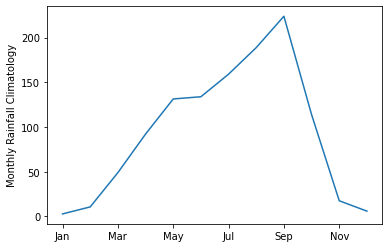

In [136]:
#Monthly Rainfall Climatology
acsv.mean(axis=0).plot(ylabel='Monthly Rainfall Climatology')       

# Exercise 1

1. Create a dataframe and populate with a multi-column data of temperature and pressure.

2. Build a lambda function or a regular python function that computes the Potential Temperature based on the equation $\theta = T(1000/p)^{0.286}$, where $T$ is temperature in Kelvin, $p$ is pressure in hPa and $\theta$ is the potential temperature to be computed.

3. Write the Potential temperature output as a new series within the created dataframe.

4. Print out the first 20 rows of the new dataframe.

Exercise 2
------------------------
Pandas read_csv() method can also be used with txt files. This exercise will help you navigate around that. The goal is to produce similar temperature anomaly plot as you did while using numpy, however, for a selected/sliced period.
> 1. With pandas read_csv method, load the nh_temperature.txt file. Set header to None within the read_csv() parenthesis, since the data has no header. Also set the sep to ' ', since columns are separated by spaces and not comma's.<br>

> 2. Rename the columns to ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] using .columns() method'

> 3. set the Year as index and drop from existing tabular data.<br>

> 4. Slice data for 1860 to 2010.<br>

> 5. Plot the Annual mean temperature anomaly.

# pandas with Excel files and seaborn

*notebook by Jeffrey N. A. Aryee*

In this session, you will be working with data contained in a spreadsheet. The file, named `Test_RR_TnTx_data.xlsx` contains three (3) separate sheets of Rainfall, Minimum Temperature and Maximum Temperature from the Ghana Meteorological Agency (GMet). The data is an *in situ* observation with a short term temporal span intended for the Python education. Kindly note that the acquired data must serve only the educational purpose intended.

We'll also be seeing how to use `seaborn` to produce useful plots for studying correlations and relationships in the observations. And we'll be using the `pymannkendall` package which implements the Mann-Kendall method for finding trends in the observations.


***Let's start by importing relevant packages.***

In [137]:
import seaborn as sb  # Useful for artistic and more scientific data visualization
import pymannkendall as mk  # Useful Python package for identifying Mann-Kendall trends in a dataset.

from pathlib import Path

In [140]:
data_path = Path("data")

## 12. Loading data from `.xlsx` Excel spreadsheet file

We'll now read in the rainfall and temperature data from different sheets in a single `.xslx` Excel spreadsheet file. This is done with the `pd.read_excel` function.

Note: the `xlrd` package (which `pandas` used to use for reading `.xslx`-files) [recently removed support for `.xslx`-files](https://stackoverflow.com/a/65266270/271776)). Fortunately `pandas` can use `openpyxl` instead, but unless you pandas version `>=1.2.0` you will have to tell `pandas` to use `openpyxl` using the `engine='openpyxl'` argument when opening a file (as we do below).

Sheet **RR** contains Daily Rainfall Totals, sheet **Tn** contains Daily Minimum Temperature and **Tx** contains the Daily Maximum Temperature data.

In [141]:
filepath_spreadsheet = data_path / "Test_RR_TnTx_data.xlsx"
# Rainfall
df_RR = pd.read_excel(filepath_spreadsheet, sheet_name="RR", engine="openpyxl")
# Minimum Temperature
df_TN = pd.read_excel(filepath_spreadsheet, sheet_name="Tn", engine="openpyxl")
# Maximum Temperature
df_TX = pd.read_excel(filepath_spreadsheet, sheet_name="Tx", engine="openpyxl")

In each sheet, the data is stored as:

- **Column A :** the Station Name (for 3 stations, namely: Tamale, Kumasi and Tema).
- **Column B :** abbreviation of parameter of interest (eg. RR for rainfall)
- **Column C :** Year of observation
- **Column D :** Month of observation
- **Columns E to AI :** Daily Data (Day 1 to maximum days in the month. Eg. Columns E to AI on the second rows contains data for 1st to 31st January 2010)

The first row contains the headers of each column and `pandas` uses this to set the column names

Let's have a look at the first few rows of the loaded rainfall data

In [142]:
df_RR.head()

,Name,Eg El Abbreviation,Year,Month,Val01,Val02,Val03,Val04,Val05,Val06,...,Val22,Val23,Val24,Val25,Val26,Val27,Val28,Val29,Val30,Val31
0,Tamale,RR,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tamale,RR,2010,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,Tamale,RR,2010,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tamale,RR,2010,4,0.0,0.0,0.0,0.0,0.9,0.0,...,89.1,0.0,0.0,0.0,73.3,1.5,0.0,0.0,0.0,NaN
4,Tamale,RR,2010,5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.6


## 13. Reshaping spreadsheet data

We want to turn this tabular data from this "wide"-format, where each row contains more than one value to one where there is only one value per row. I.e. we want to reshape this table from one where each row contains each data for a each individual day in a given month and year, to one where one row only contains the rain for a single year, month and day.

For this operation (which is the opposite to creating a "pivot" on the data) we can use pandas's [DataFrame.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) method. In it we provide which columns contain the "id" of a data-value (i.e. which columns are label for the data) and the rest are then assumed to be columns containing data (which columns to use for data can explicitly be given with the `value_vars` variable):

In [143]:
df_RR.melt(
    id_vars=[
        "Name",
        "Eg El Abbreviation",
        "Year",
        "Month",
    ],
)

,Name,Eg El Abbreviation,Year,Month,variable,value
0,Tamale,RR,2010,1,Val01,0.0
1,Tamale,RR,2010,2,Val01,0.0
2,Tamale,RR,2010,3,Val01,0.0
3,Tamale,RR,2010,4,Val01,0.0
4,Tamale,RR,2010,5,Val01,0.0
...,...,...,...,...,...,...
4459,Tema,RR,2013,8,Val31,0.0
4460,Tema,RR,2013,9,Val31,NaN
4461,Tema,RR,2013,10,Val31,0.0
4462,Tema,RR,2013,11,Val31,NaN


This is almost here, though we would prefer to have the actual day of the month rather than `Val01`, `Val02` etc. To achieve this we just need to rename the columns before we apply the `.melt` operation. We can also tell pandas what we want the column that contains these labels to be called, we'll make that `Day`

In [144]:
fields_to_rename = {f"Val{n:02d}": n for n in range(1, 32)}
fields_to_rename

{'Val01': 1,
 'Val02': 2,
 'Val03': 3,
 'Val04': 4,
 'Val05': 5,
 'Val06': 6,
 'Val07': 7,
 'Val08': 8,
 'Val09': 9,
 'Val10': 10,
 'Val11': 11,
 'Val12': 12,
 'Val13': 13,
 'Val14': 14,
 'Val15': 15,
 'Val16': 16,
 'Val17': 17,
 'Val18': 18,
 'Val19': 19,
 'Val20': 20,
 'Val21': 21,
 'Val22': 22,
 'Val23': 23,
 'Val24': 24,
 'Val25': 25,
 'Val26': 26,
 'Val27': 27,
 'Val28': 28,
 'Val29': 29,
 'Val30': 30,
 'Val31': 31}

In [145]:
df_RR.rename(columns=fields_to_rename, inplace=True)
df_RR

,Name,Eg El Abbreviation,Year,Month,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,Tamale,RR,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tamale,RR,2010,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,Tamale,RR,2010,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tamale,RR,2010,4,0.0,0.0,0.0,0.0,0.9,0.0,...,89.1,0.0,0.0,0.0,73.3,1.5,0.0,0.0,0.0,NaN
4,Tamale,RR,2010,5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Tema,RR,2013,8,0.0,0.0,0.0,0.0,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,Tema,RR,2013,9,0.1,0.0,0.0,0.0,6.5,0.0,...,0.0,7.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
141,Tema,RR,2013,10,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,Tema,RR,2013,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.8,0.0,4.9,0.0,0.0,0.0,0.0,9.9,NaN


We now call `.melt` again, and specify what we want the column which contains the day-numbers to be called.

We'll also use the `.dropna()` function to get rid of any rows where the value is NaN (which for example will be on days where the month doens't have 31 days)

In [146]:
df_RR_flat = df_RR.melt(
    id_vars=[
        "Name",
        "Eg El Abbreviation",
        "Year",
        "Month",
    ],
    var_name="Day",
).dropna()
df_RR_flat

,Name,Eg El Abbreviation,Year,Month,Day,value
0,Tamale,RR,2010,1,1,0.0
1,Tamale,RR,2010,2,1,0.0
2,Tamale,RR,2010,3,1,0.0
3,Tamale,RR,2010,4,1,0.0
4,Tamale,RR,2010,5,1,0.0
...,...,...,...,...,...,...
4456,Tema,RR,2013,5,31,0.0
4458,Tema,RR,2013,7,31,0.0
4459,Tema,RR,2013,8,31,0.0
4461,Tema,RR,2013,10,31,0.0


Additionally, we'd like to have the full date defined in a single column instead of having the components of the date split into three different columns. To achieve this we can use the [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function (you should click and have a look at its documentation). This function is so clever that if you pass it a DataFrame which contains columns with names `year`, `month`, `day`, `hour` etc it will automatically work out how to combine these and produce a single `pd.DataSeries` with datetimes that we can add as a new column to our exising dataframe.

In [147]:
pd.to_datetime(df_RR_flat[["Year", "Month", "Day"]])

0      2010-01-01
1      2010-02-01
2      2010-03-01
3      2010-04-01
4      2010-05-01
          ...    
4456   2013-05-31
4458   2013-07-31
4459   2013-08-31
4461   2013-10-31
4463   2013-12-31
Length: 4383, dtype: datetime64[ns]

In [148]:
df_RR_flat["date"] = pd.to_datetime(df_RR_flat[["Year", "Month", "Day"]])
df_RR_flat

,Name,Eg El Abbreviation,Year,Month,Day,value,date
0,Tamale,RR,2010,1,1,0.0,2010-01-01
1,Tamale,RR,2010,2,1,0.0,2010-02-01
2,Tamale,RR,2010,3,1,0.0,2010-03-01
3,Tamale,RR,2010,4,1,0.0,2010-04-01
4,Tamale,RR,2010,5,1,0.0,2010-05-01
...,...,...,...,...,...,...,...
4456,Tema,RR,2013,5,31,0.0,2013-05-31
4458,Tema,RR,2013,7,31,0.0,2013-07-31
4459,Tema,RR,2013,8,31,0.0,2013-08-31
4461,Tema,RR,2013,10,31,0.0,2013-10-31


The last thing we want to do is get rid of the columns we don't need anymore (`Eg El Abbrevation`, `Year`, `Month` and `Day`), make the new `date` column the index and finally split the stations into separate columns so that we can get the data just for the Tamale station by selecting its column.

In [149]:
# pick out the columns we want to keep and set the "date" column as the index
df_RR_flat[["Name", "value", "date"]].set_index("date")

,Name,value
date,,
2010-01-01,Tamale,0.0
2010-02-01,Tamale,0.0
2010-03-01,Tamale,0.0
2010-04-01,Tamale,0.0
2010-05-01,Tamale,0.0
...,...,...
2013-05-31,Tema,0.0
2013-07-31,Tema,0.0
2013-08-31,Tema,0.0


Turning the dataframe back from this "long"-format with one entry-per-row to one with a column for each station, is the opposite of the `.melt` operation we did earlier. To do this kind of operation in pandas we can use the [DataFrame.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot) function; we simply say we want to pivot on the `Name` column:

In [150]:
df_RR_flat[["Name", "value", "date"]].set_index("date").pivot(columns="Name")

value             
Name       Kumasi Tamale  Tema
date                          
2010-01-01    0.0    0.0   0.0
2010-01-02    0.0    0.0   0.0
2010-01-03    0.0    0.0   0.0
2010-01-04    0.0    0.0   0.0
2010-01-05    0.0    0.0   0.0
...           ...    ...   ...
2013-12-27    0.0    0.0   0.0
2013-12-28    0.0    0.0   0.0
2013-12-29    0.0    0.0   0.0
2013-12-30    0.0    0.0  24.8
2013-12-31   15.1    0.0   0.0

[1461 rows x 3 columns]

You will see that the `value`-label is hovering above the name of the stations. That is because the numbers in the `value` column now have formed an axes in our data. We can simply pick out that axes just like we pick out columns, and we have the final result we wanted:

In [151]:
df_RR_flat[["Name", "value", "date"]].set_index("date").pivot(columns="Name")["value"]

Name,Kumasi,Tamale,Tema
date,,,
2010-01-01,0.0,0.0,0.0
2010-01-02,0.0,0.0,0.0
2010-01-03,0.0,0.0,0.0
2010-01-04,0.0,0.0,0.0
2010-01-05,0.0,0.0,0.0
...,...,...,...
2013-12-27,0.0,0.0,0.0
2013-12-28,0.0,0.0,0.0
2013-12-29,0.0,0.0,0.0


Let's wrap all this functionality we just wrote into a single function that we can apply on the data-frame we originally loaded. This will make it really clear (when we come back another day say) what steps we went through, and makes it easy to apply the operations to each sheet (rain amount, minimum temperature and maximum temperature). Because every pandas operation on a `DataFrame` returns a new `DataFrame` we can use what is often called [method-chaining](https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac) to make the code a lot easier to read:

In [152]:
def reshape_from_monthrows_to_daily(df):
    """
    Take a station-data DataFrame (loaded from a Excel spredsheet)
    with values per day in a given months a columns and month, year and station by row
    and reshape into data per date with stations given as columns
    """
    fields_to_rename = {f"Val{n:02d}": n for n in range(1, 32)}

    df_flat = (
        df.rename(columns=fields_to_rename, inplace=False)
        .melt(
            id_vars=[
                "Name",
                "Eg El Abbreviation",
                "Year",
                "Month",
            ],
            var_name="Day",
        )
        .dropna()
    )

    # add the date column, we've added `errors="coerse"` here because the max temperature data appears
    # to include an invalid dates, for these rows the "date" will be set as NaT (nan-time)
    df_flat["date"] = pd.to_datetime(df_flat[["Year", "Month", "Day"]], errors="coerce")

    # drop all NaT rows, the `~` means not, i.e. keep only values where the date is not NaT
    df_flat = df_flat[~pd.isnull(df_flat["date"])]

    return (
        df_flat[["Name", "value", "date"]]
        .set_index("date")
        .pivot(columns="Name")["value"]
    )


reshape_from_monthrows_to_daily(df_RR)

Name,Kumasi,Tamale,Tema
date,,,
2010-01-01,0.0,0.0,0.0
2010-01-02,0.0,0.0,0.0
2010-01-03,0.0,0.0,0.0
2010-01-04,0.0,0.0,0.0
2010-01-05,0.0,0.0,0.0
...,...,...,...
2013-12-27,0.0,0.0,0.0
2013-12-28,0.0,0.0,0.0
2013-12-29,0.0,0.0,0.0


In [153]:
# this can also be applied to the temperature data
reshape_from_monthrows_to_daily(df_TN)

Name,Kumasi,Tamale,Tema
date,,,
2010-01-01,22.7,20.500000,26.1
2010-01-02,22.5,18.300000,26.0
2010-01-03,23.2,16.700000,25.9
2010-01-04,23.4,16.000000,27.0
2010-01-05,22.5,14.200000,26.5
...,...,...,...
2013-12-27,22.2,17.400000,25.2
2013-12-28,22.5,16.733333,26.2
2013-12-29,24.0,16.466667,26.5


In [154]:
df_TX

,Name,Eg El Abbreviation,Year,Month,Val01,Val02,Val03,Val04,Val05,Val06,...,Val22,Val23,Val24,Val25,Val26,Val27,Val28,Val29,Val30,Val31
0,Tamale,Tx,2010,1,36.0,35.8,36.9,36.6,37.1,37.5,...,37.4,37.6,37.7,38.8,38.7,39.2,38.5,39.5,40.5,40.5
1,Tamale,Tx,2010,2,38.4,39.8,39.6,39.0,38.4,38.0,...,38.7,40.1,40.6,40.2,39.0,39.7,40.5,NaN,NaN,NaN
2,Tamale,Tx,2010,3,39.2,39.5,40.6,40.2,39.6,39.2,...,36.4,37.5,37.7,38.0,40.0,40.5,39.5,40.0,39.6,39.5
3,Tamale,Tx,2010,4,40.6,40.0,39.5,39.5,39.6,34.5,...,39.4,33.5,34.5,34.5,34.4,28.8,33.7,35.5,34.0,NaN
4,Tamale,Tx,2010,5,35.4,34.1,35.0,35.1,34.8,33.8,...,35.6,36.6,34.2,37.0,34.5,36.6,37.0,35.5,33.8,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Tema,Tx,2013,8,27.0,26.6,26.5,27.8,28.5,27.0,...,27.6,28.4,27.8,28.0,28.1,28.4,28.7,28.8,28.1,27.7
140,Tema,Tx,2013,9,28.4,27.8,28.1,29.0,29.0,27.5,...,29.5,28.1,26.6,28.0,28.2,28.2,28.2,28.6,29.2,NaN
141,Tema,Tx,2013,10,30.0,29.0,29.9,32.0,30.0,29.6,...,30.2,30.8,31.2,31.0,31.0,30.6,31.5,31.0,30.8,31.5
142,Tema,Tx,2013,11,31.7,31.2,31.0,31.3,31.0,31.0,...,31.1,31.5,29.1,30.5,31.1,31.2,31.5,32.0,32.0,NaN


In [155]:
df_RR_by_station = reshape_from_monthrows_to_daily(df_RR)
df_TN_by_station = reshape_from_monthrows_to_daily(df_TN)
df_TX_by_station = reshape_from_monthrows_to_daily(df_TX)

The process we've just gone through is often called "data wrangling":

**What is Data Wrangling?**

Data wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time. Data wrangling is increasingly ubiquitous. In simpler terms, data wrangling (sometimes referred to as data munging) entails transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. 
Data has become more diverse and unstructured, demanding increased time spent culling, cleaning, and organizing data ahead of broader analysis. <br>

**Reference:** <br>
> https://www.trifacta.com/data-wrangling/ <br>
> https://en.wikipedia.org/wiki/Data_wrangling <br><br><br>



With this premise established, we will wrangle the rainfall/temperature data, and this will be addressed as such.

> Vertically stacking the data using a DateTime index <br>
> Basic manipulation and dealing with missing values <br>
> Resampling to a different frequency
---------------------------------------------------------------------------------------------------------------------------------

## 14. Visualization with `seaborn`

Seaborn is a Python data visualization library based on matplotlib **(https://seaborn.pydata.org/)**. It provides a high-level interface for drawing attractive and informative statistical graphics. `seaborn` can be installed with `pip` and `conda` as other python packages.

### KDE Plot

Let's start off with data distribution plots using Seaborn's Kernel Density Estimates (KDE), which is a method for estimating the underlying distribution that data is sampled from by smoothing the sampled using a Gaussian kernel. KDE represents the data using a continuous probability density curve in one or more dimensions. There are other ways of estimating the distribution. <br>

Seaborn allows us to visualize the distribution of these observations, analagous to a histogram. 

Text(0.5, 0, 'Rainfall (mm)')

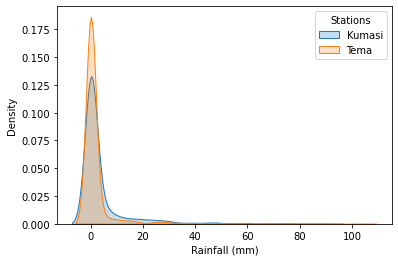

In [156]:
#### Sample Seaborn Visualizations
sb.kdeplot(
    df_RR_by_station["Kumasi"].astype(float), legend=True, shade=True
)  # Distribution plot
sb.kdeplot(
    df_RR_by_station["Tema"].astype(float), legend=True, shade=True
)  # Distribution plot

plt.legend(title="Stations", loc="upper right", labels=["Kumasi", "Tema"])
plt.xlabel("Rainfall (mm)")

### Scatter Plot

Scatter plots represent values for two different numeric variables. Scatter plots are used to observe relationships between the two variables.

> Let's attempt to see if there's a synergy in the rainfall events in any two locations (eg. Kumasi and Tema)

Text(0.5, 1.0, 'Rainfall in Kumasi against Tema')

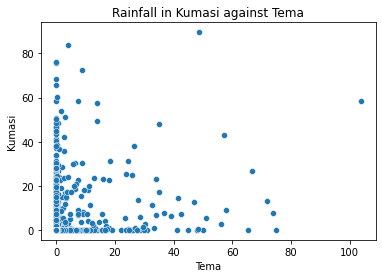

In [157]:
sb.scatterplot(y="Kumasi", x="Tema", data=df_RR_by_station)
plt.title("Rainfall in Kumasi against Tema")

### Joint Plot

Seaborn's jointplot draws a plot of two variables with bivariate and univariate graphs. The bivariate plot (bottom left) produces a clustered diagram, which is useful in cluster analysis.

> Histograms rather produced an error when this command was originally issued. This may not be same in your case. However, as control, the dataset was formatted to floats by using the astype() method and passing the function float as an argument. 

(0.0, 40.0)

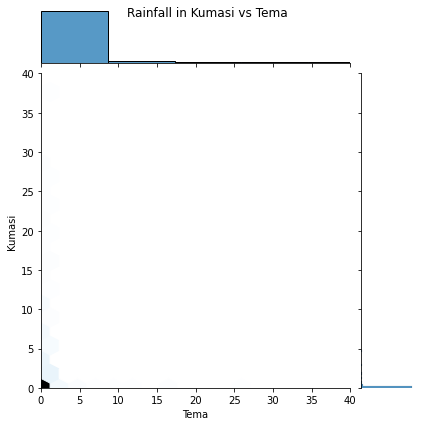

In [158]:
sb.jointplot(x="Tema", y="Kumasi", data=df_RR_by_station, kind="hex")
plt.suptitle("Rainfall in Kumasi vs Tema \n\n\n")
plt.xlim(0, 40)
plt.ylim(0, 40)

## 15. Grouping Data with Groupby() function

Let's replicate the jointplot using monthly rainfall totals. Here, we will utilise the pandas groupby() function, in tandem with the Pandas Grouper class.

The Pandas groupby() method allows for creating categories or groupings, for groupwise approximations, function applications, etc.

```python
df.groupby(pd.Grouper(freq='Y')).aggregate(np.sum).plot()  # Annual Total
df.groupby(pd.Grouper(freq='M')).aggregate(np.sum).plot()  # Monthly Total
```

Alternatively, we can use the resample method (shown below): <br>

```python
df.resample('M').sum()   # Monthly Total
df.resample('Y').sum()   # Annual Total
```

You notice that we utilise the `pd.Grouper` class. A `Grouper` allows you to specify a groupby instruction for an object. This specification will select a column via the key parameter, or if the level and/or axis parameters are given, a level of the index of the target object. If axis and/or level are passed as keywords to both Grouper and groupby, the values passed to Grouper take precedence. In the example above, we pass the frequency as a datetime format (eg. "Y" for year, "M" for month, "MS" for start of month, etc.). This allows for grouping the dataframe into either yearly (first example) or monthly (second example) categories.

Thereafter, we employ the aggregate function, while passing as argument, the numpy summation function (`np.sum`). This produces the summation of each monthly or yearly grouping.

Now, let's replicate the jointplot using monthly rainfall totals.

Text(0.5, 0.98, 'Rainfall in Kumasi against Tema \n\n\n')

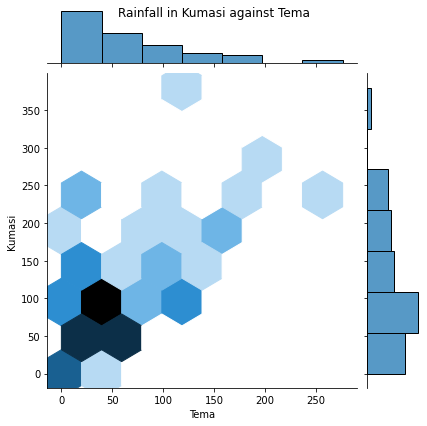

In [159]:
sb.jointplot(
    x="Tema",
    y="Kumasi",
    data=df_RR_by_station.groupby(pd.Grouper(freq="M")).sum(),
    kind="hex",
)
plt.suptitle("Rainfall in Kumasi against Tema \n\n\n")

Pair Plot
----------------------------
A simple way of identifying relations between each numerical series of a dataframe.

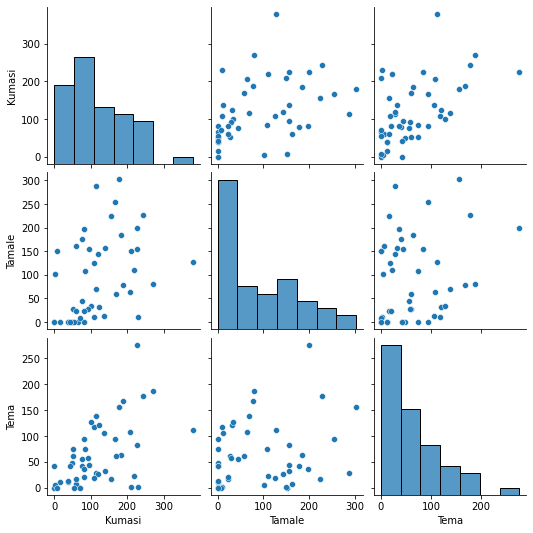

In [160]:
sb.pairplot(df_RR_by_station.groupby(pd.Grouper(freq="M")).sum(), diag_kind="hist")

## 16. Working with timeseries data

By providing `subplots=True` to `DataFrame.plot(...)` each column will be put into its own subplot. The call will return the axes that the data was plotted into and we can then iterate over these to set the attributes of the plot that we would like:

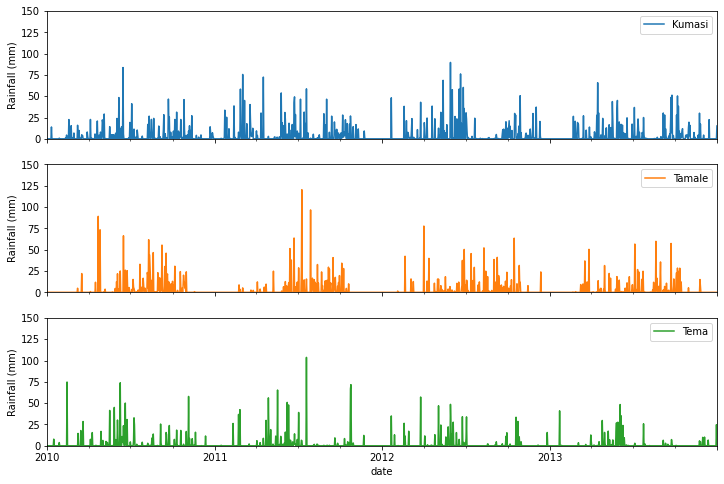

In [161]:
axes = df_RR_by_station.plot(linestyle="-", figsize=(12, 8), subplots=True)
for ax in axes:
    ax.set_ylabel("Rainfall (mm)")
    ax.set_ylim(0, 150)

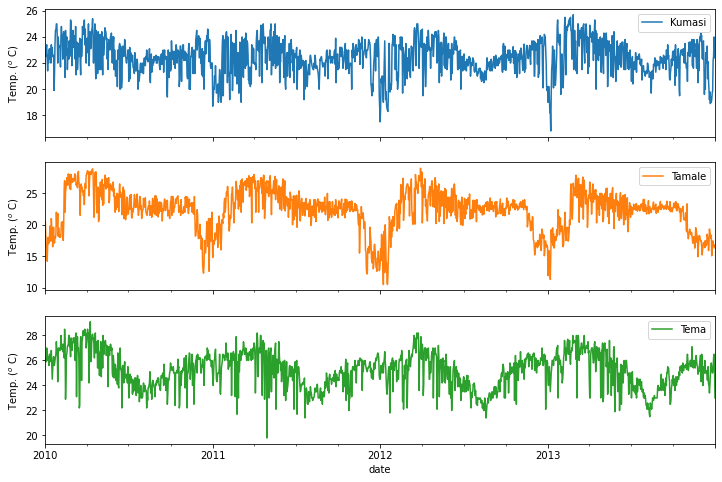

In [162]:
# We can repeat this for the daily minimum temperature data.
axes = df_TN_by_station.plot(linestyle="-", figsize=(12, 8), subplots=True)
for ax in axes:
    ax.set_ylabel(r"Temp. ($^o$ C)")

### grouped time-series

We can also use the group-by operations to get resampled timeseries. 

```python
df.groupby(pd.Grouper(freq='Y')).aggregate(np.sum).plot()  # Annual Total
df.groupby(pd.Grouper(freq='M')).aggregate(np.sum).plot()  # Monthly Total
```

<AxesSubplot:xlabel='date'>

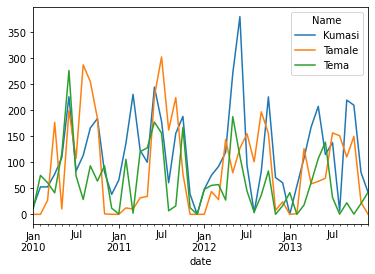

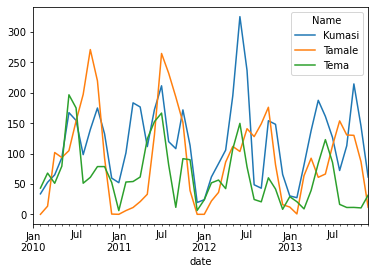

In [163]:
#### Moving Averages
df_Month_Data = df_RR_by_station.groupby(pd.Grouper(freq="M")).aggregate(np.sum)
df_Month_Data.plot()
df_Month_Data.rolling(2).mean().plot()

Text(0.5, 1.0, 'Events above the Percentile')

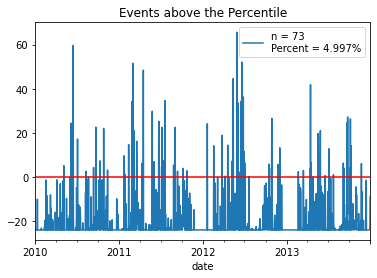

In [164]:
perc=df_RR_by_station['Kumasi'].quantile(.95)   #This produces the 95th percentile value.
diff=(df_RR_by_station['Kumasi']-perc)
Events_95 = diff.where(diff>0).count()
percentage=round((Events_95/diff.count())*100, 3) #Compute the percentage of extreme events in a defined station
diff.plot(label='n = '+str(Events_95)+'\nPercent = '+str(percentage)+'%')
plt.axhline(y=0, color='r')
plt.legend()
plt.title('Events above the Percentile')



## 17. Trend Assessmet using PyMannKendall

Pymannkendall (**https://pypi.org/project/pymannkendall/**) allows for trend assessment in a dataset/observation. The package details out numerous sub-packages that are useful for various forms of trend assessment. For simplicity, we will focus on the Mann-Kendall original test. Nonetheless, feel free to try out its numerous trend assessment types after the class. [publication](https://www.researchgate.net/publication/334688255_pyMannKendall_a_python_package_for_non_parametric_Mann_Kendall_family_of_trend_tests)

In [165]:
import pymannkendall as mk

mk.original_test?

In [166]:
# Trends In Data With PyMannKendall
mk.original_test(df_RR_by_station["Kumasi"].astype(float))

Mann_Kendall_Test(trend='no trend', h=False, p=0.8654923860158847, z=-0.16938682484329096, Tau=-0.0024978200331917527, s=-2664.0, var_s=247162784.0, slope=0.0, intercept=0.0)

The output from the above cell provides <br>

**Output:**
>    trend: tells the trend (increasing, decreasing or no trend)<br>
>    h: True (if trend is present) or False (if trend is absence)<br>
>    p: p-value of the significance test (eg. P<0.05 implies data is significant at 95% confidence level)  <br>
>    z: normalized test statistics <br>
>    Tau: Kendall Tau <br>
>    s: Mann-Kendal's score <br>
>    var_s: Variance S <br>
>    slope: sen's slope <br>

Next, we attempt to produce the slopes for each given station's monthly rainfall totals

In [167]:
stations = df_RR_by_station.columns

for station in stations:
    print(
        station,
        mk.original_test(
            df_RR_by_station[station]
            .groupby(pd.Grouper(freq="M"))
            .sum()
            .dropna()
            .astype(float)
        ).slope,
    )

Kumasi 0.38977272727272727
Tamale 0.0
Tema -0.7999999999999994


In [168]:
df_TX_by_station

Name,Kumasi,Tamale,Tema
date,,,
2010-01-01,31.8,36.000000,30.7
2010-01-02,33.5,35.800000,30.8
2010-01-03,33.1,36.900000,31.0
2010-01-04,33.0,36.600000,31.0
2010-01-05,31.0,37.100000,32.0
...,...,...,...
2013-12-27,31.2,36.819444,32.0
2013-12-28,33.1,36.700000,31.7
2013-12-29,30.0,37.080556,31.8


## Exercise 1


Produce standardized anomaly plots (formula below) of Daily Mean Temperature for the different stations and visualize it. The Standardized Anomaly $z$ is defined as $z_i = \frac{T_i - <T>}{\sigma_T}$, where $<T>$ is the mean of temperature and $\sigma_T$ is the standard deviation of temperature.
- Hint: First, build a function of standardized anomaly (You can use the default function build in python or better still, make use of lambda functions.) Second, pass Tavg through the function, and plot out.

## Exercise 2

For the stacked data: <br><br>
    1. Compute Monthly and Annual Mean Temperature <br>
    2. Identify the trends and magnitude of slope in the computed means in (1).<br>
    3. Using seaborn jointplot, let's produce a cluster plot of temperature and rainfall in any of the other locations. <br>